In [91]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
# for dataset management
import pandas as pd

In [92]:
from google.colab import files
uploaded = files.upload()

Saving Reg-Data.txt to Reg-Data (1).txt


In [342]:
data = pd.read_csv('Reg-Data.txt', sep=',')

In [343]:
data.columns=np.arange(0,70,1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
1,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
2,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
3,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85
4,0.059217,0.034537,-0.703441,0.188652,-0.270353,1.420526,0.467766,0.209594,-0.496505,1.239908,0.241493,-0.258381,1.944521,-1.037235,0.250967,-0.106169,0.012665,1.208937,1.136594,-0.499356,-0.812315,0.707096,0.155801,0.451774,0.854111,1.211973,0.227121,-0.626188,-0.094155,-0.057997,-0.074075,-0.289063,-0.685688,-0.422618,1.791713,1.392260,-0.166716,0.290893,0.284940,1.040583,0.056155,1.119458,1.659770,-0.302015,0.164696,1.381299,-0.241382,0.089011,-0.454603,-0.398362,0.224597,2.949133,2.856510,0.039530,-0.196953,0.526687,1.241737,0.728226,1.404666,1.428818,0.501017,-0.354263,0.445184,0.060328,0.075293,-0.170387,-0.506187,-0.008470,12.65,-8.00


In [344]:
 cols2zscore = data.keys()
data[cols2zscore] = data[cols2zscore]/np.max(data[cols2zscore])#.apply(stats.zscore)
cols2zscore
# convert from pandas dataframe to tensor

# # but first drop residual sugar
cols2zscore = cols2zscore.drop([68,69])

X= data[cols2zscore].values
xy = data[[68,69]].values

In [345]:
from sklearn.model_selection import train_test_split

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, xy, test_size=0.15, random_state=101)

In [347]:
from sklearn.linear_model import LinearRegression

In [348]:
model = LinearRegression()

In [349]:
model.fit(X_train,y_train)

LinearRegression()

In [350]:
test_predictions = model.predict(X_test)

In [351]:
#test_predictions

In [352]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [353]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [354]:
MAE

0.24334345914314104

In [355]:
MSE

0.10392781167276609

In [356]:
RMSE

0.3223783672530868

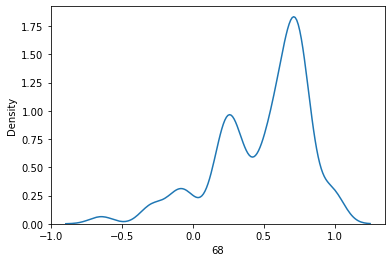

In [357]:
sns.kdeplot(data[68])

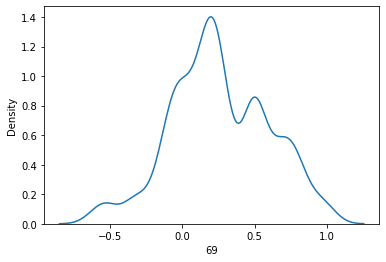

In [358]:
sns.kdeplot(data[69])

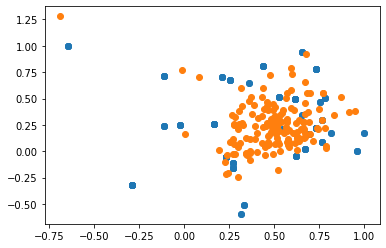

In [359]:
import matplotlib.pyplot as plt
plt.scatter(y_test[:,0],y_test[:,1])
plt.scatter(test_predictions[:,0],test_predictions[:,1])

In [360]:
from sklearn.linear_model import Ridge

In [361]:
ridge_model = Ridge(alpha=10)

In [362]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [363]:
test_predictions = ridge_model.predict(X_test)

In [364]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [365]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [366]:
MAE

0.24951040998675994

In [367]:
RMSE

0.32172194671236953

In [368]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.22397677696652135

### Choosing an alpha value with Cross-Validation

In [408]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=np.arange(0.01,10,0.01),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)
print("alfa is : {}".format(ridge_cv_model.alpha_))
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print("MAE is : {}".format(MAE))
print("MSE is : {}".format(MSE))
print("RMSE is : {}".format(RMSE))

alfa is : 1.87
MAE is : 0.2440260278641619
MSE is : 0.1021992988250367
RMSE is : 0.31968625060367656
